# Numpy y Matplotlib 2

En esta clase vamos a resolver un problema mientras exploramos un poco las bondades de numpy y lo fácil que es graficar y tunear gráficas con matplotlib.

Nos piden calcular la velocidad y aceleración (en función del tiempo) de una pelota, a partir de un archivo de texto donde la primera columna son tiempos y la segunda posiciones. 

Nuestro plan será el siguiente:
1. Leer el archivo
2. Calcular velocidades y aceleraciones
3. Hacer gráficas simultáneas

In [ ]:
# Importar numpy 
import numpy as np

Primero, recordemos el código que escribimos la semana pasada:

In [ ]:
# Leer y almacenar datos 

#Abrimos el archivo en modo leer
infile = open('file.txt','r')

#Leer líneas y almacenar los valores
L = []                                                                          # Inicializar lista con líneas                                                       
T = []                                                                          # Inicializar lista con tiempos
Y = []                                                                          # Inicializar lista con posiciones

for line in infile.readlines():
    L.append(line)                                                              # Almacenar líneas

for line in L:
    T.append(float(line.split()[0]))                                            # Almacenar tiempos
    Y.append(float(line.split()[1]))                                            # Almacenar posiciones
    
#Cerrar el archivo
infile.close()

Ahora, comparemos eso con lo que podemos hacer con numpy:

In [ ]:
file = np.loadtxt("file.txt")                                                   # Explorar el archivo 

t = file[:,0]                                                                   # Extraer y almacenar primera columna
y = file[:,1]                                                                   # Extraer y almacenar segunda columna

Notamos lo ridículamente fácil que se vuelve esto al usar al poderosísimo numpy. Ahora exploremos un poco sobre derivación numérica. 


Una derivada numérica se puede calcular con la siguiente fórmula: $$\frac{dy}{dx}_k=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$$

Naturalmente pensamos en hacer un ciclo `for` de la siguiente manera:

In [ ]:
#derivación numérica usando un algoritmo usual
v = []
for i in range(len(x)-1):
    v = np.append(v, float( (x[i+1]-x[i]) / (t[i+1]-t[i])) )

Sin embargo, si lo que queremos es facilitarnos la vida y ahorrar tiempo, podemos usar numpy:


In [ ]:
#Usamos np.diff(), exploren en la terminal qué hace esta función
dx = np.diff(x)
dt = np.diff(t)[0]

v = dx/dt                                                                       # Las derivadas son fracciones jeje
a = dv/dt

Listo, numpy ya hizo todo el trabajo por nosotros. Ahora grafiquemos los resultados que obtuvimos. Para esto, importamos pyplot.


In [ ]:
import matplotlib.pyplot as plt

Una gráfica normal, como vimos ayer, se puede hacer fácilmente así:

In [ ]:
plt.plot(x,y,'figura para cada punto')

Sin embargo, queremos hacer gráficas un poco más elaboradas o profesionales. Así que les propongo lo siguiente, grafiquemos de forma simultánea la posición, velocidad y aceleración. Exploremos un poco un plot horizontal:

In [ ]:
# Gráficas
fig, (ax,ax2,ax3) = plt.subplots(1,3)                                           # Una fila, tres columnas

# Primer plot
ax.plot(args)

# Segundo plot
ax2.plot(args)

# Tercer plot 
ax3.plot(args)

# Mostrar plot
plt.show()

También podemos hacer plots verticales, estos sirven para hacer gráficas que dependen de la misma variable independiente.

In [ ]:
fig, ax = plt.subplots(3, gridspec_kw={'hspace': 0.05})

# Primer plot
ax[0].plot(t,x,'.')
ax.flat[0].set(ylabel= '$x [m]$')                                               # Ponerle label al eje y del primer plot                         

# Segundo plot
ax[1].plot(t[:-1],v,'.')
ax.flat[1].set(ylabel= '$v [m/s]$')                                             # Ponerle label al eje y del segundo plot 

# Tercer plot
ax[2].plot(t[:-2],a,'.')                                       
ax.flat[2].set(ylabel= '$a [m/s^2]$')                                           # Ponerle label al eje y del tercer plot 

# Mostrar el resultado
plt.xlabel(r'$t [s]$')                                                          # Poner label al eje x
plt.show()

In [ ]:
# Ya todo tuneado

fig, ax = plt.subplots(2, gridspec_kw={'hspace': 0.05})

ax[0].plot(t,x,'.', color='skyblue')
ax[0].plot(t,x,'-', linewidth=0.8 ,color='black')
ax.flat[0].set(ylabel= '$x [m]$')

ax[0].plot(t[:-1],v,'.', color='skyblue')
ax[0].plot(t[:-1],v,'-', linewidth=0.8 ,color='black')
#ax.flat[1].set(ylabel= '$v [m/s]$')

ax[1].plot(t[:-2],a,'.', color='skyblue')
ax[1].plot(t[:-2],a,'-', linewidth=0.8 ,color='black')
ax.flat[1].set(ylabel= '$a [m/s^2]$')

plt.xlabel(r'$t [s]$')
plt.show()

Tarea: 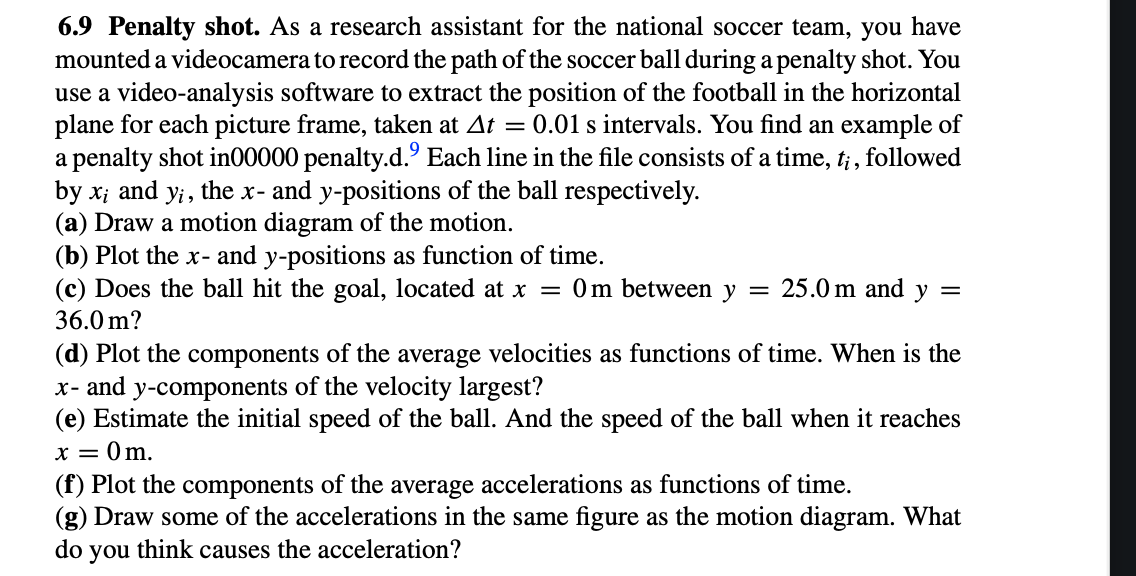

Guarden estos [datos](https://folk.universitetetioslo.no/malthe/mechbook/penalty.d) en un archivo .txt